<a href="https://colab.research.google.com/github/yadu7701/supervisedlearning/blob/main/knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accuracy: 1.00

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Enter value for sepal length (cm): 5
Enter value for sepal width (cm): 2
Enter value for petal length (cm): 5
Enter value for petal width (cm): 1


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Predicted Iris Species: versicolor


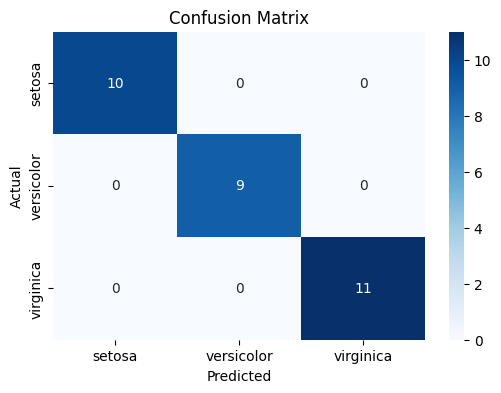

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data['species'] = iris.target

# Prepare the data
X = data.drop(columns=['species'])  # Exclude the target column
y = data['species']  # Target column (species)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features for KNN (optional but recommended for KNN performance)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and fit the KNN model
model = KNeighborsClassifier(n_neighbors=5)  # You can change the number of neighbors (k)
model.fit(X_train_scaled, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test_scaled)

# Calculate accuracy and other metrics
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Function to make predictions
def predict_iris(features):
    new_sample = np.array(features).reshape(1, -1)
    new_sample_scaled = scaler.transform(new_sample)
    prediction = model.predict(new_sample_scaled)
    return iris.target_names[prediction[0]]

# Example of getting input from the user
input_values = []
for feature in X.columns:
    value = float(input(f"Enter value for {feature}: "))
    input_values.append(value)

# Make prediction
outcome = predict_iris(input_values)
print(f'Predicted Iris Species: {outcome}')

# Plot the actual vs predicted values using a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
